In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plateaumodules as pm

workdir="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78", #
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",# #"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0", #
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", # #"Wenpuju03",
     "Lajigai-a","Lierbao0","Hedong4"] #"Qunke1","Hupo8", #"Lajigai2",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM3", #"PukagongmaM2",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1", #
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
eas=["Han","She","Miao","Tujia","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
pops=low+high+eas+tib
fh="UPA16.f3.T_Mbuti_S1_aTib+More_S2_aTib+More.log"

name="aTib+subEA"
out="Mbuti"
mypops1=[pops,pops,out]
DorZ="f3"


newfh1=fh.split(".")[0]+"."+DorZ+"."+"%s_%s_%s" % (name,name,out)
f3ary = pm.mkf3ary(workdir,fh,mypops1,2,(0,1),DorZ)    

f3dat=pd.DataFrame(f3ary)
rownames={ind:pops[ind] for ind in range(len(pops))}
f3dat=f3dat.rename(rownames, axis='columns')
f3dat=f3dat.rename(rownames, axis='index')
f3dat.to_csv(workdir+newfh1+".csv", sep='\t')

In [8]:
import plateaumodules as pm
pm.mkf3ary??

In [93]:
target=["ZongriM32","Zongri-b","Zongri-c"]
low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78", #
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",# #"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0", #
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", # #"Wenpuju03",
     "Lajigai-a"] #"Qunke1","Hupo8", #"Lajigai2",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM3", #"PukagongmaM2",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1", #
     "CaixiutangJ2-13","YushuSGZ-1"] #
target1=["Daxiang0","LiuwanQH-1","Hejiatai","Hedong6","XiahaishiM9","Sanheyi11","Wuba","HuoshaogouM117","Hupo-a"]
target1=low+high
target1=["Chokhopani","Mebrak","Samdzong"]
target1=["Han","Miao","She","Tujia","Lierbao0","Hedong4"]
target2=["QijiapingM104-2","Jinchankou0","QijiapingM89-2","QijiapingM108-2"]
subary = f3ary[[pops.index(i) for i in target1],:][:,[pops.index(i) for i in target2]]
print subary[~np.isnan(subary)].mean()
print subary[~np.isnan(subary)].std()
print subary[~np.isnan(subary)].max()
print subary[~np.isnan(subary)].min()
print subary

0.300015541667
0.00264062992767
0.30482
0.293724
[[ 0.30482   0.301988  0.298545  0.298812]
 [ 0.302263  0.301808  0.297662  0.300053]
 [ 0.304256  0.299572  0.296395  0.296248]
 [ 0.304     0.301061  0.298505  0.300012]
 [ 0.301915  0.299855  0.299488  0.293724]
 [ 0.301939  0.297251  0.3014    0.298801]]


In [77]:
print f3ary[~np.isnan(f3ary)].mean()
print f3ary[~np.isnan(f3ary)].std()
print f3ary[~np.isnan(f3ary)].max()
print f3ary[~np.isnan(f3ary)].min()

0.295521348792
0.00709438133325
0.325966
0.275391


In [74]:
%%writefile /mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/makeheatmap.R


library(gplots)
library(RColorBrewer)
pd="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
fh="UPA16.f3."
name="aTib+subEA_aTib+subEA_Mbuti"
#name="aTib+EA_aTib+EA_Mbuti"
#name="aTib_aTib_Mbuti"
myfile=read.csv(paste(pd,fh,name,".csv",sep=""),sep="\t",header=T)

mydat=subset(myfile, select = -c(X) )
rownames(mydat)=colnames(mydat)
#pdf(paste(pd,fh,name,".pdf",sep=""))
png(paste(pd,fh,name,".png",sep=""))
#mydat[is.na(mydat)] <- 0
mydat=data.matrix(mydat)
mycolors=colorRampPalette(c("brown","red","orange","light yellow", "medium sea green","royal blue"))(n = 299)
mycolors=colorRampPalette(c("red","orange","yellow"))(n = 299)
mycolors=rev(mycolors)
v=heatmap.2(mydat,symkey=FALSE,trace="none",dendrogram="none",cexRow=0.8,cexCol=0.8,margins=c(7,7),col=mycolors)
x=rownames(mydat)[v$rowInd]
mynames=data.frame(x)
write.table(mynames,paste(pd,fh,name,".sorted.txt",sep=""),sep="\t",row.names=F,quote=F)
dev.off()

Overwriting /mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/makeheatmap.R


In [75]:
%%bash
R CMD BATCH /mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/makeheatmap.R

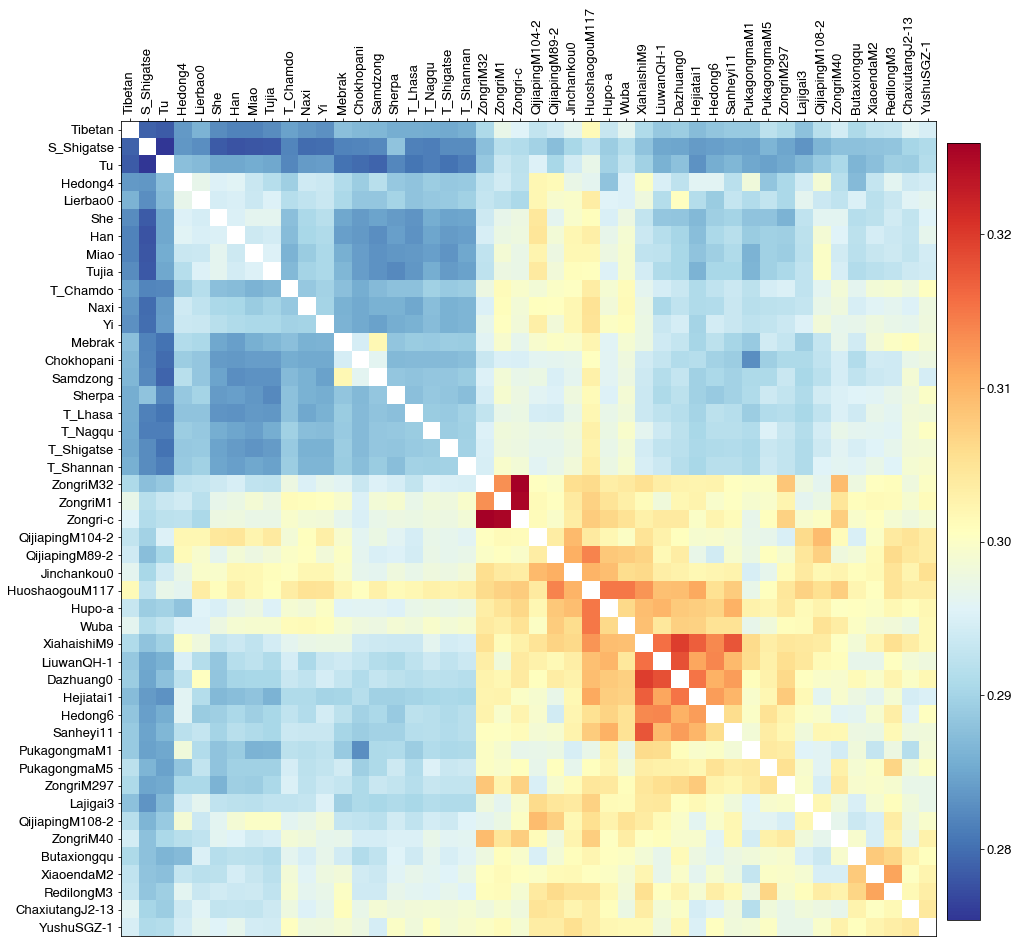

In [30]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as ticker

rcParams['font.family'] = 'Helvetica-Normal'
rcParams['font.size'] = 13
fh="UPA16.f3.T_Mbuti_S1_aTib+More_S2_aTib+More.log"
pD="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
names=["aTib+subEA_aTib+subEA_Mbuti","aTib+EA_aTib+EA_Mbuti","aTib_aTib_Mbuti"]
names=["aTib+subEA_aTib+subEA_Mbuti"]
alterednames={"Lajigai-a":"Lajigai3","Zongri-a":"ZongriM297","Zongri-b":"ZongriM1"}
alterednames["Tibetan_ShigatseX"]="T_Shigatse"
alterednames["Tibetan_ShannanX"]="T_Shannan"
alterednames["Tibetan_NagquX"]="T_Nagqu"
alterednames["Tibetan_LhasaX"]="T_Lhasa"
alterednames["Tibetan_ChamdoX"]="T_Chamdo"
alterednames["Sherpa_ShigatseX"]="S_Shigatse"
alterednames["Hejiatai"]="Hejiatai1"
alterednames["Daxiang0"]="Dazhuang0"
alterednames["CaixiutangJ2-13"]="ChaxiutangJ2-13"
for name in names:
    orderedfile=open(pD+"UPA16.f3.%s.sorted.txt" % (name),'r')
    mylst=[line.strip().replace('.','-') for ind,line in enumerate(orderedfile) if ind!=0]
    orderedfile.close()

    pops,name=mylst,"aGQ"
    out="Mbuti"
    mypops1=[pops,pops,out]
    DorZ="f3"

    f3ary = pm.mkf3ary(pD,fh,mypops1,2,(0,1),DorZ)    
    #print pm.Zmat2xlsx(f3ary,pD+newfh1,pops,pops,0,1)
    #pp = PdfPages(pD+'EDF2_outf3_new.pdf')
    fig,ax = plt.subplots(figsize=(15,15))
    fs=14
    #plt.imshow(f3ary, cmap='Blues', interpolation='nearest')
    plt.imshow(f3ary, cmap='RdYlBu_r', interpolation='nearest')
    #plt.imshow(f3ary, cmap='YlOrRd', interpolation='nearest')
    #plt.imshow(f3ary, cmap='Spectral_r', interpolation='nearest')
    #plt.imshow(f3ary, cmap='BrBG', interpolation='nearest')
    #plt.imshow(f3ary, cmap='coolwarm', interpolation='nearest')
    # We want to show all ticks...
    #locs = np.arange(len(mypops1[0]))
    
    #ax.set_xticks(np.arange(len(mypops1[0])-0.5),minor=True)
    #ax.set_yticks(np.arange(len(mypops1[1])-0.5),minor=True)
    #ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    #ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    #ax.set_xticks(np.arange(len(mypops1[0])),minor=False)
    #ax.set_yticks(np.arange(len(mypops1[1])),minor=False)
    # ... and label them with the respective list entries
    #formattednames=[i[:-1] if i[-1]=="X" else i for i in mypops1[0]]
    formattednames=[i if i not in alterednames else alterednames[i] for i in mypops1[0]]
    emptyset=["" for i in mypops1[0]]
    ax.set_xticklabels('', fontsize=fs,rotation=75,ha='left')
    ax.set_yticklabels('', fontsize=fs,va='top')
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set(ticks=np.arange(len(formattednames)), ticklabels=formattednames)
    ax.xaxis.tick_top()
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    
    #ax.set_xticklabels(formattednames, minor=True,fontsize=fs,rotation=75,ha='left')
    #ax.set_yticklabels(formattednames, minor=True,fontsize=fs,va='top')
    #ax.xaxis.set_minor_formatter(ticker.FixedFormatter(formattednames))
    #ax.invert_yaxis()
    
    cax=fig.add_axes([0.9, 0.14, 0.03, 0.72])
    #fig.colorbar(ax,cax=cax)
    plt.colorbar(cax=cax)
    #pp.savefig(bbox_inches = "tight")
    #pp.close()
plt.show()

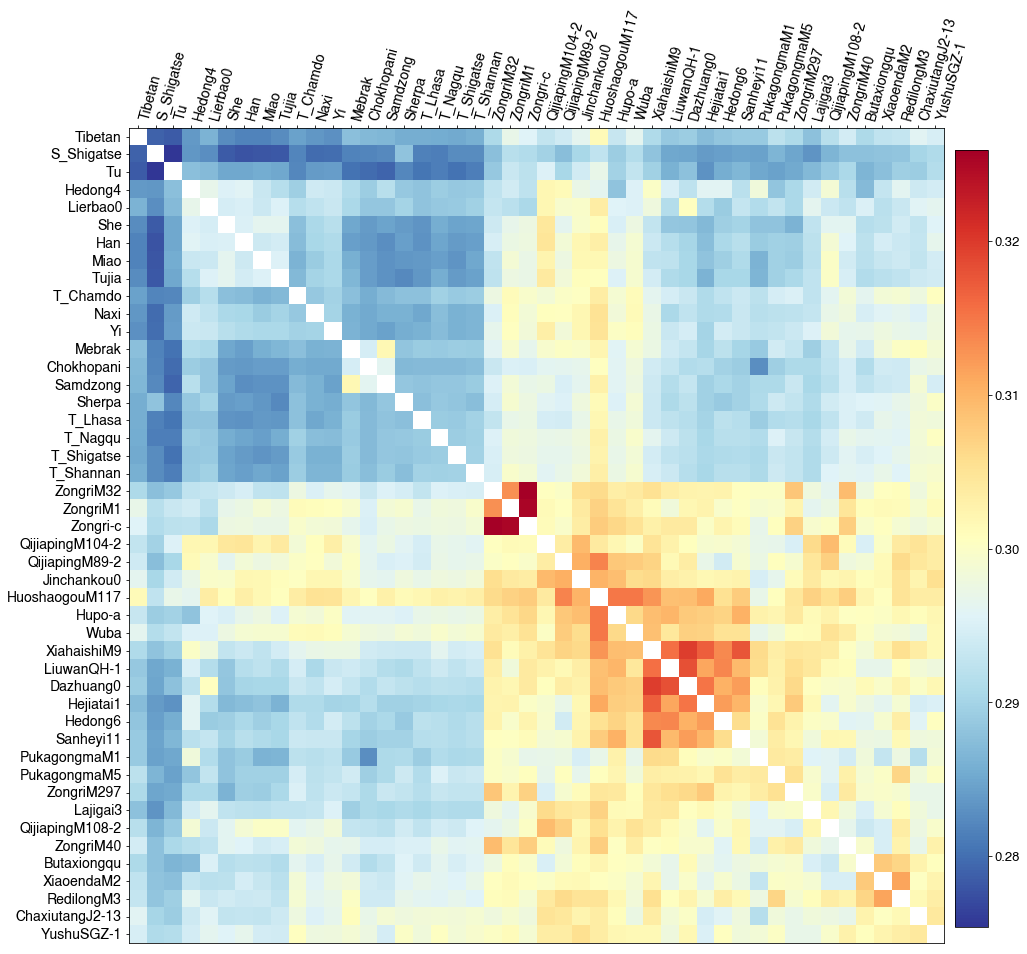

In [18]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as ticker

rcParams['font.family'] = 'Helvetica-Normal'
rcParams['font.size'] = 13
fh="UPA16.f3.T_Mbuti_S1_aTib+More_S2_aTib+More.log"
pD="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
names=["aTib+subEA_aTib+subEA_Mbuti","aTib+EA_aTib+EA_Mbuti","aTib_aTib_Mbuti"]
names=["aTib+subEA_aTib+subEA_Mbuti"]
alterednames={"Lajigai-a":"Lajigai3","Zongri-a":"ZongriM297","Zongri-b":"ZongriM1"}
alterednames["Tibetan_ShigatseX"]="T_Shigatse"
alterednames["Tibetan_ShannanX"]="T_Shannan"
alterednames["Tibetan_NagquX"]="T_Nagqu"
alterednames["Tibetan_LhasaX"]="T_Lhasa"
alterednames["Tibetan_ChamdoX"]="T_Chamdo"
alterednames["Sherpa_ShigatseX"]="S_Shigatse"
alterednames["Hejiatai"]="Hejiatai1"
alterednames["Daxiang0"]="Dazhuang0"
alterednames["CaixiutangJ2-13"]="ChaxiutangJ2-13"
for name in names:
    orderedfile=open(pD+"UPA16.f3.%s.sorted.txt" % (name),'r')
    mylst=[line.strip().replace('.','-') for ind,line in enumerate(orderedfile) if ind!=0]
    orderedfile.close()

    pops,name=mylst,"aGQ"
    out="Mbuti"
    mypops1=[pops,pops,out]
    DorZ="f3"

    f3ary = pm.mkf3ary(pD,fh,mypops1,2,(0,1),DorZ)    
    #print pm.Zmat2xlsx(f3ary,pD+newfh1,pops,pops,0,1)
    pp = PdfPages(pD+'EDF2_outf3_new.pdf')
    fig,ax = plt.subplots(figsize=(15,15))
    fs=14
    #plt.imshow(f3ary, cmap='Blues', interpolation='nearest')
    plt.imshow(f3ary, cmap='RdYlBu_r', interpolation='nearest')
    #plt.imshow(f3ary, cmap='YlOrRd', interpolation='nearest')
    #plt.imshow(f3ary, cmap='Spectral_r', interpolation='nearest')
    #plt.imshow(f3ary, cmap='BrBG', interpolation='nearest')
    #plt.imshow(f3ary, cmap='coolwarm', interpolation='nearest')
    # We want to show all ticks...
    #locs = np.arange(len(mypops1[0]))
    
    ax.set_xticks(np.arange(len(mypops1[0])),minor=False)
    ax.set_yticks(np.arange(len(mypops1[1])),minor=False)
    #ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    #ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    #ax.set_xticks(np.arange(len(mypops1[0])),minor=False)
    #ax.set_yticks(np.arange(len(mypops1[1])),minor=False)
    # ... and label them with the respective list entries
    #formattednames=[i[:-1] if i[-1]=="X" else i for i in mypops1[0]]
    formattednames=[i if i not in alterednames else alterednames[i] for i in mypops1[0]]
    emptyset=["" for i in mypops1[0]]
    #ax.set_xticklabels('', fontsize=fs,rotation=75,ha='left')
    #ax.set_yticklabels('', fontsize=fs,va='top')
    ax.xaxis.tick_top()
    ax.set_xticklabels(formattednames, minor=False,fontsize=fs,rotation=75,ha='left')
    ax.set_yticklabels(formattednames, minor=False,fontsize=fs,va='center')
    #ax.xaxis.set_minor_formatter(ticker.FixedFormatter(formattednames))
    #ax.invert_yaxis()
    
    cax=fig.add_axes([0.9, 0.14, 0.03, 0.72])
    #fig.colorbar(ax,cax=cax)
    plt.colorbar(cax=cax)
    pp.savefig(bbox_inches = "tight")
    pp.close()
plt.show()

In [82]:
ax.set_xticklabels??

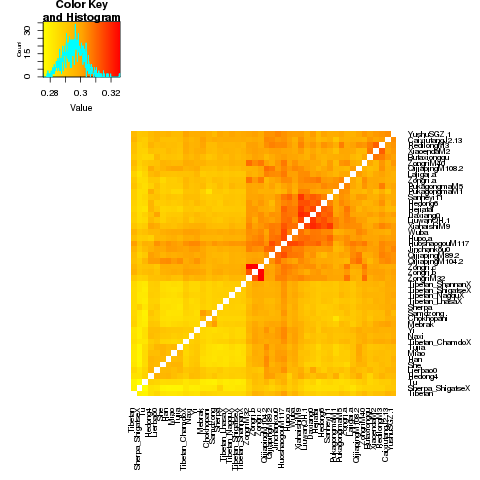

In [76]:
from IPython.display import Image
Image(filename='/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/UPA16.f3.aTib+subEA_aTib+subEA_Mbuti.png') 

In [47]:

print mylst

['Hedong4', 'Lierbao0', 'Mebrak', 'Chokhopani', 'Samdzong', 'HuoshaogouM117', 'Wuba', 'Hupo-a', 'Daxiang0', 'XiahaishiM9', 'Hedong6', 'Sanheyi11', 'Hejiatai', 'LiuwanQH-1', 'Zongri-c', 'Zongri-b', 'ZongriM32', 'PukagongmaM1', 'ZongriM40', 'PukagongmaM5', 'Zongri-a', 'Butaxiongqu', 'XiaoendaM2', 'RedilongM3', 'CaixiutangJ2-13', 'YushuSGZ-1', 'QijiapingM108-2', 'Lajigai-a', 'Jinchankou0', 'QijiapingM104-2', 'QijiapingM89-2']


In [6]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages

rcParams['font.family'] = 'Helvetica-Normal'
rcParams['font.size'] = 13
fh="UPA16.f3.T_Mbuti_S1_aTib+More_S2_aTib+More.log"
pD="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
names=["aTib+subEA_aTib+subEA_Mbuti","aTib+EA_aTib+EA_Mbuti","aTib_aTib_Mbuti"]
names=["aTib+subEA_aTib+subEA_Mbuti"]
alterednames={"Lajigai-a":"Lajigai3","Zongri-a":"ZongriM297","Zongri-b":"ZongriM1"}
#alterednames["Tibetan_ShigatseX"]="T_Shigatse"
#alterednames["Tibetan_ShannanX"]="T_Shannan"
#alterednames["Tibetan_NagquX"]="T_Nagqu"
#alterednames["Tibetan_LhasaX"]="T_Lhasa"
#alterednames["Tibetan_ChamdoX"]="T_Chamdo"
#alterednames["Sherpa_ShigatseX"]="S_Shigatse"
alterednames["Hejiatai"]="Hejiatai1"
alterednames["Daxiang0"]="Dazhuang0"
alterednames["CaixiutangJ2-13"]="ChaxiutangJ2-13"
for name in names:
    orderedfile=open(pD+"UPA16.f3.%s.sorted.txt" % (name),'r')
    mylst=[line.strip().replace('.','-') for ind,line in enumerate(orderedfile) if ind!=0]
    orderedfile.close()

    pops,name=mylst,"aGQ"
    out="Mbuti"
    mypops1=[pops,pops,out]
    DorZ="f3"

    f3ary = pm.mkf3ary(pD,fh,mypops1,2,(0,1),DorZ)    
    #print pm.Zmat2xlsx(f3ary,pD+newfh1,pops,pops,0,1)
    pp = PdfPages(pD+'EDF2_outf3.pdf')
    fig,ax = plt.subplots(figsize=(15,15))
    fs=13
    plt.imshow(f3ary, cmap='Blues', interpolation='nearest')
    # We want to show all ticks...
    
    ax.set_xticks(np.arange(len(mypops1[0])))
    ax.set_yticks(np.arange(len(mypops1[1])))
    # ... and label them with the respective list entries
    
    #formattednames=[i[:-1] if i[-1]=="X" else i for i in mypops1[0]]
    formattednames=[i if i not in alterednames else alterednames[i] for i in mypops1[0]]
    ax.set_xticklabels(formattednames, minor=False,fontsize=fs,rotation=75,ha='left')
    ax.set_yticklabels(formattednames, minor=False,fontsize=fs,va='top')
    #ax.invert_yaxis()
    ax.xaxis.tick_top()
    cax=fig.add_axes([0.9, 0.14, 0.03, 0.72])
    #fig.colorbar(ax,cax=cax)
    plt.colorbar(cax=cax)
    pp.savefig(bbox_inches = "tight")
    pp.close()
#plt.show()

In [3]:
import numpy as np
import plateaumodules as pm

datpd="/mnt/solexa/mel_yang/aPlateau/update051518/"
outpd="/mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/"
outpd="/mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/"
fh,tv,out=("complete2.dstat.log","","Mbuti")
fh,tv,out=("complete2.tv.dstat.log",".tv","Mbuti")

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",#"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0",
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", #"Wenpuju03",
     "Lajigai-a"] #"Qunke1","Hupo8","Lajigai2","Hedong4","Lierbao0",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM2","PukagongmaM3",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1",
     "CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"] #,"YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tu","Sherpa",
     "Tibetan","Tibetan_ChamdoX","Tibetan_ShannanX","Tibetan_ShigatseX"]
others=["ZongriM78","XiahaishiM22","Hupo14","Shangluzhuang0","Wenpuju03","Qunke1","Hupo8","Lajigai2","Hedong4",
       "PukagongmaM2","PukagongmaM3","XiaoendaM1"]
#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=low+high
popB=low+high
thirdpops=["CaixiutangJ2-13"]
for myind in thirdpops:
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,myind,popB,out]
    mypops2=[popA,popB,myind,out]
    DorZ="Z"

    newfh1=fh.split(".")[0]+tv+DorZ+"."+"aTib_%s_aTib_%s" % (myind,out)
    newfh2=fh.split(".")[0]+tv+DorZ+"."+"aTib_aTib_%s_%s" % (myind,out)
    Zary = pm.mkDary(datpd,fh,mypops1,(1,3),(0,2),DorZ)    
    print pm.Zmat2xlsx(Zary,outpd+newfh1,popA,popB,0,2)

    Zary = pm.mkDary(datpd,fh,mypops2,(2,3),(0,1),DorZ)   
    print pm.Zmat2xlsx(Zary,outpd+newfh2,popA,popB,0,1)

Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2.tvZ.aTib_CaixiutangJ2-13_aTib_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2.tvZ.aTib_aTib_CaixiutangJ2-13_Mbuti!
